In [ ]:
# Uncomment the following lines to install the required packages for this script
# !pip install pydicom nibabel matplotlib numpy

In [ ]:
# Import de las librerías necesarias
import os
import pydicom
import csv
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


In [ ]:
import os

for root, dirs, files in os.walk('./serie'):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")


Root: ./images
Directories: ['serie']
Files: ['.DS_Store', 'image.nii', 'segmentation.nii']
Root: ./images/serie
Directories: []
Files: ['IM000100.dcm', 'IM000666.dcm', 'IM000672.dcm', 'IM000114.dcm', 'IM000128.dcm', 'IM000699.dcm', 'IM000464.dcm', 'IM000302.dcm', 'IM000316.dcm', 'IM000470.dcm', 'IM000458.dcm', 'IM000510.dcm', 'IM000276.dcm', 'IM000262.dcm', 'IM000504.dcm', 'IM000538.dcm', 'IM000289.dcm', 'IM000074.dcm', 'IM000712.dcm', 'IM000706.dcm', 'IM000060.dcm', 'IM000048.dcm', 'IM000049.dcm', 'IM000707.dcm', 'IM000061.dcm', 'IM000075.dcm', 'IM000713.dcm', 'IM000288.dcm', 'IM000539.dcm', 'IM000263.dcm', 'IM000505.dcm', 'IM000511.dcm', 'IM000277.dcm', 'IM000459.dcm', 'IM000317.dcm', 'IM000471.dcm', 'IM000465.dcm', 'IM000303.dcm', 'IM000698.dcm', 'IM000129.dcm', 'IM000673.dcm', 'IM000115.dcm', 'IM000101.dcm', 'IM000667.dcm', 'IM000117.dcm', 'IM000671.dcm', 'IM000665.dcm', 'IM000103.dcm', 'IM000659.dcm', 'IM000473.dcm', 'IM000315.dcm', 'IM000301.dcm', 'IM000467.dcm', 'IM000329.dcm',

In [4]:
# Imprime todos los archivos en el directorio actual
for file in os.listdir('.'):
    print(file)

.DS_Store
images
pratica.ipynb
cortes_centrales_con_segmentacion.png
slice_metadata.csv


In [ ]:

dcm_files = []
dcm_data = []
# 1. Carga la serie de archivos DICOM del paciente case_practica1
for root, dirs, files in os.walk('./images'):
    # este codigo assume que 
    # 1. Todos los archivos DICOM en ./images son del paciente case_practica1
    # 2. Todos los archivos DICOM tienen la extensión .dcm
    for file in files:
        if file.lower().endswith('.dcm'):
            filepath = os.path.join(root, file)
            dcm_files.append(filepath)
            dcm_data.append(pydicom.dcmread(filepath))



Explorando directorio: ./images
Procesando archivo: .DS_Store
Procesando archivo: image.nii
Procesando archivo: segmentation.nii
Explorando directorio: ./images/serie
Procesando archivo: IM000100.dcm
Procesando archivo: IM000666.dcm
Procesando archivo: IM000672.dcm
Procesando archivo: IM000114.dcm
Procesando archivo: IM000128.dcm
Procesando archivo: IM000699.dcm
Procesando archivo: IM000464.dcm
Procesando archivo: IM000302.dcm
Procesando archivo: IM000316.dcm
Procesando archivo: IM000470.dcm
Procesando archivo: IM000458.dcm
Procesando archivo: IM000510.dcm
Procesando archivo: IM000276.dcm
Procesando archivo: IM000262.dcm
Procesando archivo: IM000504.dcm
Procesando archivo: IM000538.dcm
Procesando archivo: IM000289.dcm
Procesando archivo: IM000074.dcm
Procesando archivo: IM000712.dcm
Procesando archivo: IM000706.dcm
Procesando archivo: IM000060.dcm
Procesando archivo: IM000048.dcm
Procesando archivo: IM000049.dcm
Procesando archivo: IM000707.dcm
Procesando archivo: IM000061.dcm
Procesan

In [ ]:


# 1. a) Ordena los cortes de los pacientes
# (Puedes quitar los comentarios de los print para ver el orden antes y después de ordenar)
# print(f"La orden de la localización de los cortes antes de ordenar es: {[get_slice_location(ds) for ds in dcm_data]}")

# Definimos una función para obtener la localización del corte
def get_slice_location(ds):
    # Intenta obtener SliceLocation, si no existe usa ImagePositionPatient[2]
    if 'SliceLocation' in ds:
        # print(f"SliceLocation found: {ds.SliceLocation}")
        return float(ds.SliceLocation)
    else:
        # print("No SliceLocation or ImagePositionPatient found, returning default value 0.0.")
        return 0.0  # valor por defecto si no existe ninguno

# Ordenar dcm_data y dcm_files según la localización del corte
sorted_indices = sorted(range(len(dcm_data)), key=lambda i: get_slice_location(dcm_data[i]))
dcm_data = [dcm_data[i] for i in sorted_indices]
dcm_files = [dcm_files[i] for i in sorted_indices]

# print(f"La orden de la localización de los cortes despues de ordenar es: {[get_slice_location(ds) for ds in dcm_data]}")

La orden de la localización de los cortes despues de ordenar es: [-394.28, -393.78, -393.28, -392.78, -392.28, -391.78, -391.28, -390.78, -390.28, -389.78, -389.28, -388.78, -388.28, -387.78, -387.28, -386.78, -386.28, -385.78, -385.28, -384.78, -384.28, -383.78, -383.28, -382.78, -382.28, -381.78, -381.28, -380.78, -380.28, -379.78, -379.28, -378.78, -378.28, -377.78, -377.28, -376.78, -376.28, -375.78, -375.28, -374.78, -374.28, -373.78, -373.28, -372.78, -372.28, -371.78, -371.28, -370.78, -370.28, -369.78, -369.28, -368.78, -368.28, -367.78, -367.28, -366.78, -366.28, -365.78, -365.28, -364.78, -364.28, -363.78, -363.28, -362.78, -362.28, -361.78, -361.28, -360.78, -360.28, -359.78, -359.28, -358.78, -358.28, -357.78, -357.28, -356.78, -356.28, -355.78, -355.28, -354.78, -354.28, -353.78, -353.28, -352.78, -352.28, -351.78, -351.28, -350.78, -350.28, -349.78, -349.28, -348.78, -348.28, -347.78, -347.28, -346.78, -346.28, -345.78, -345.28, -344.78, -344.28, -343.78, -343.28, -342.78

In [24]:
# 1. b) Extrae los metadatos de un corte y guárdalos en un archivo CSV
# Verifica y muestra los metadatos, imprime aviso si alguno está en blanco

required_metadata = ['PatientID', 'StudyDate', 'SeriesDescription', 'Manufacturer'] 
# Selecciona el primer corte de la serie ya cargada 
slice_metadata = dcm_data[0]
# Crea un diccionario para almacenar los metadatos
metadata = {}
# extrae los metadatos requeridos iterando sobre la lista required_metadata
for key in required_metadata:
    value = getattr(slice_metadata, key, '')
    if value == '':
        print(f"Aviso: El metadato '{key}' está en blanco.")
    else:
        print(f"El metadato '{key}' tiene el valor: {value}")
    metadata[key] = value
    

# Guarda los del dicionation metadata en un archivo CSV
with open('slice_metadata.csv', mode='w', newline='') as csvfile:
    print("Guardando los metadatos en slice_metadata.csv")
    writer = csv.writer(csvfile)
    writer.writerow(required_metadata)
    writer.writerow([metadata[key] for key in required_metadata])

El metadato 'PatientID' tiene el valor: EMR100070_2270002
El metadato 'StudyDate' tiene el valor: 20151210
El metadato 'SeriesDescription' tiene el valor: Thorax C+
El metadato 'Manufacturer' tiene el valor: Philips
Guardando los metadatos en slice_metadata.csv


In [25]:
# 1. c) Obtén de forma cuantitativa e imprime el plano de la serie

# Extrae la orientación del primer corte 
# (aqui compreendo que ImageOrientationPatient contiene 6 valores: 3 para la dirección de la fila y 3 para la columna)
orientation = slice_metadata.ImageOrientationPatient  

# Vector que representa la dirección de las filas de la imagen en 
# el sistema de coordenadas del paciente (primeros 3 valores)
row_cosines = np.array(orientation[:3], dtype=float)

# vector que representa la dirección de las columnas de la imagen 
# en el sistema de coordenadas del paciente. (últimos 3 valores)
col_cosines = np.array(orientation[3:], dtype=float)

# Calcula el vector normal al plano de la imagen 
# usando el producto vectorial de los cosenos de fila y columna
normal_vector = np.cross(row_cosines, col_cosines)

# Define los nombres de los planos anatómicos principales
planes = ['Sagital', 'Coronal', 'Axial']

# Determina el eje principal del vector normal (el de mayor valor absoluto) para identificar el plano
# (Por ejemplo, un vector normal que apunta principalmente a lo largo del eje Z del paciente suele indicar un plano Axial)
# 0 -> X (Sagital), 1 -> Y (Coronal), 2 -> Z (Axial)
axis = np.argmax(np.abs(normal_vector))

# Imprime el nombre del plano correspondiente y el vector normal calculado
print(f"Plano de la serie: {planes[axis]} (vector normal: {normal_vector})")


Plano de la serie: Axial (vector normal: [0. 0. 1.])


In [6]:
#2. Carga la imagen y su segmentación NifTI del paciente case_practica1:

image_nii = nib.load('./images/image.nii')
segmentation_nii = nib.load('./images/segmentation.nii')
image_data = image_nii.get_fdata()
segmentation_data = segmentation_nii.get_fdata()

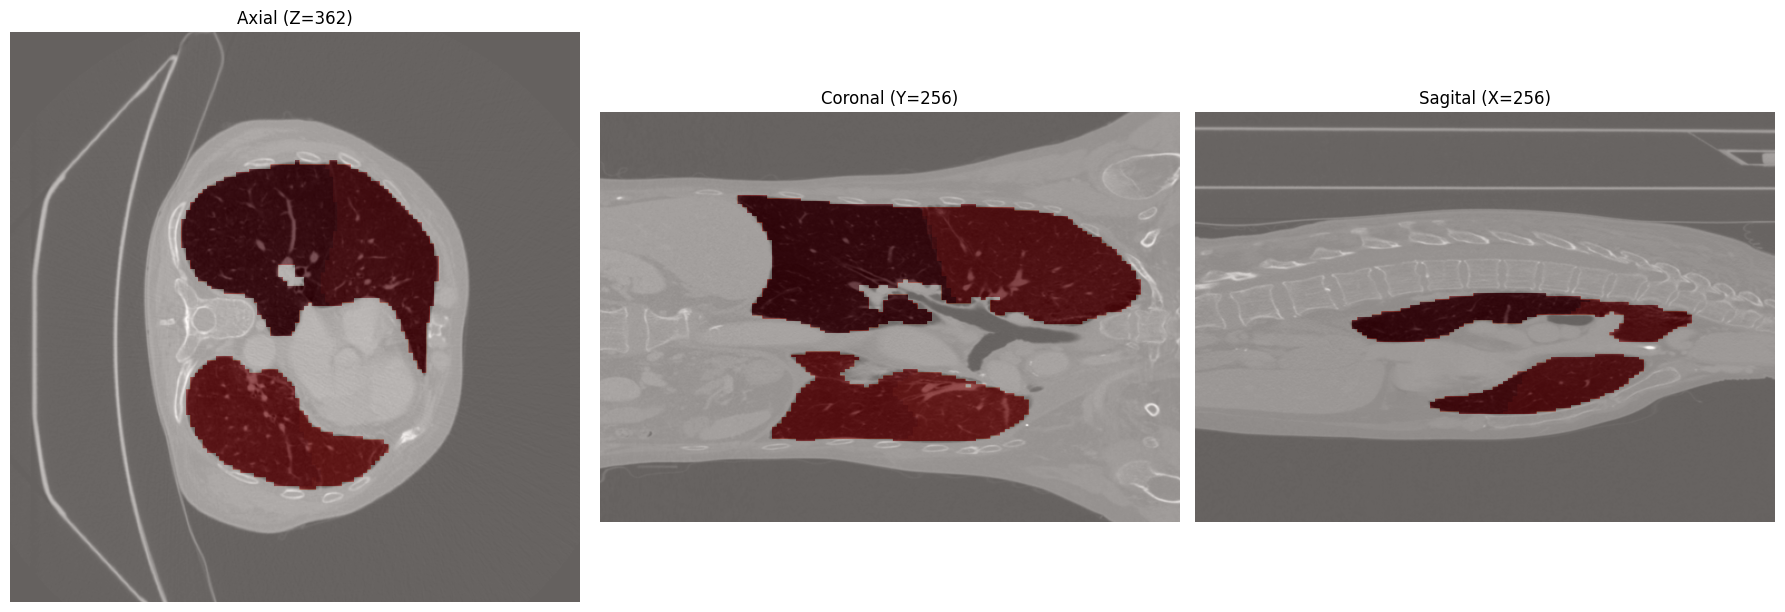

In [ ]:

# 2. a) Visualiza el corte central en los tres ejes
# Obtén los índices centrales para cada eje
center_axial = image_data.shape[2] // 2
center_coronal = image_data.shape[1] // 2
center_sagittal = image_data.shape[0] // 2

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Axial
axes[0].imshow(image_data[:, :, center_axial], cmap='gray')
axes[0].imshow(segmentation_data[:, :, center_axial], cmap='Reds', alpha=0.4)
axes[0].set_title('Axial (Z={})'.format(center_axial))
axes[0].axis('off')

# Coronal
axes[1].imshow(image_data[:, center_coronal, :], cmap='gray')
axes[1].imshow(segmentation_data[:, center_coronal, :], cmap='Reds', alpha=0.4)
axes[1].set_title('Coronal (Y={})'.format(center_coronal))
axes[1].axis('off')

# Sagital
axes[2].imshow(image_data[center_sagittal, :, :], cmap='gray')
axes[2].imshow(segmentation_data[center_sagittal, :, :], cmap='Reds', alpha=0.4)
axes[2].set_title('Sagital (X={})'.format(center_sagittal))
axes[2].axis('off')

plt.tight_layout()
# Guarda la figura con los cortes centrales antes de mostrarla
plt.savefig('cortes_centrales_con_segmentacion.png')
plt.show()

In [14]:
# 2. b) Calcula e imprime la siguiente información
# Número total de etiquetas presentes en la segmentación
num_labels = int(np.max(segmentation_data))
print(f"Número total de etiquetas presentes en la segmentación: {num_labels}")

# Volumen (en número de voxels) correspondiente a cada una de las etiquetas
labels, counts = np.unique(segmentation_data, return_counts=True)
for label, count in zip(labels, counts):
    if label == 0:
        # Es una práctica común asignar el valor 0 a los vóxeles que representan el fondo de la imagen
        # Ahi que lo separe aqui de las etiqueas de interés (que no son fondo)
        print("Etiqueta 0 ( muy probablemente fondo):", count, "voxels")
    else:  # Ignora el fondo si es 0
        print(f"Etiqueta {int(label)}: {count} voxels")

Número total de etiquetas presentes en la segmentación: 14
Etiqueta 0 ( muy probablemente fondo): 176927134 voxels
Etiqueta 10: 1240386 voxels
Etiqueta 11: 2382138 voxels
Etiqueta 12: 3761771 voxels
Etiqueta 13: 1305151 voxels
Etiqueta 14: 4437820 voxels


In [ ]:
# Valor mínimo y máximo de intensidad dentro del volumen segmentado
# asumiendo que el fondo está etiquetado con 0
mask = segmentation_data > 0
segmented_voxels = image_data[mask]
min_intensity = np.min(segmented_voxels)
max_intensity = np.max(segmented_voxels)
print(f"Valor mínimo de intensidad dentro del volumen segmentado: {min_intensity}")
print(f"Valor máximo de intensidad dentro del volumen segmentado: {max_intensity}")

Valor mínimo de intensidad dentro del volumen segmentado: -1024.0
Valor máximo de intensidad dentro del volumen segmentado: 1880.0


In [16]:
# Calcula el número de voxeles segmentados con intensidad > 100

num_voxels_above_100 = np.sum(segmented_voxels > 100)
print(f"Número de voxeles dentro del volumen segmentado con intensidad > 100: {num_voxels_above_100}")

Número de voxeles dentro del volumen segmentado con intensidad > 100: 45669
